<center><h1>Araveeti_Shriya_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [ ]:
!pip install scipy
!pip install --upgrade seaborn pandas

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 1.6 MB/s eta 0:00:0000:0100:01m


Get the Vertebral Column Data Set

In [ ]:
data = arff.loadarff('/Users/shriyaaraveeti/Downloads/vertebral_column_data (1)/column_2C_weka.arff')
df = pd.DataFrame(data[0])

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

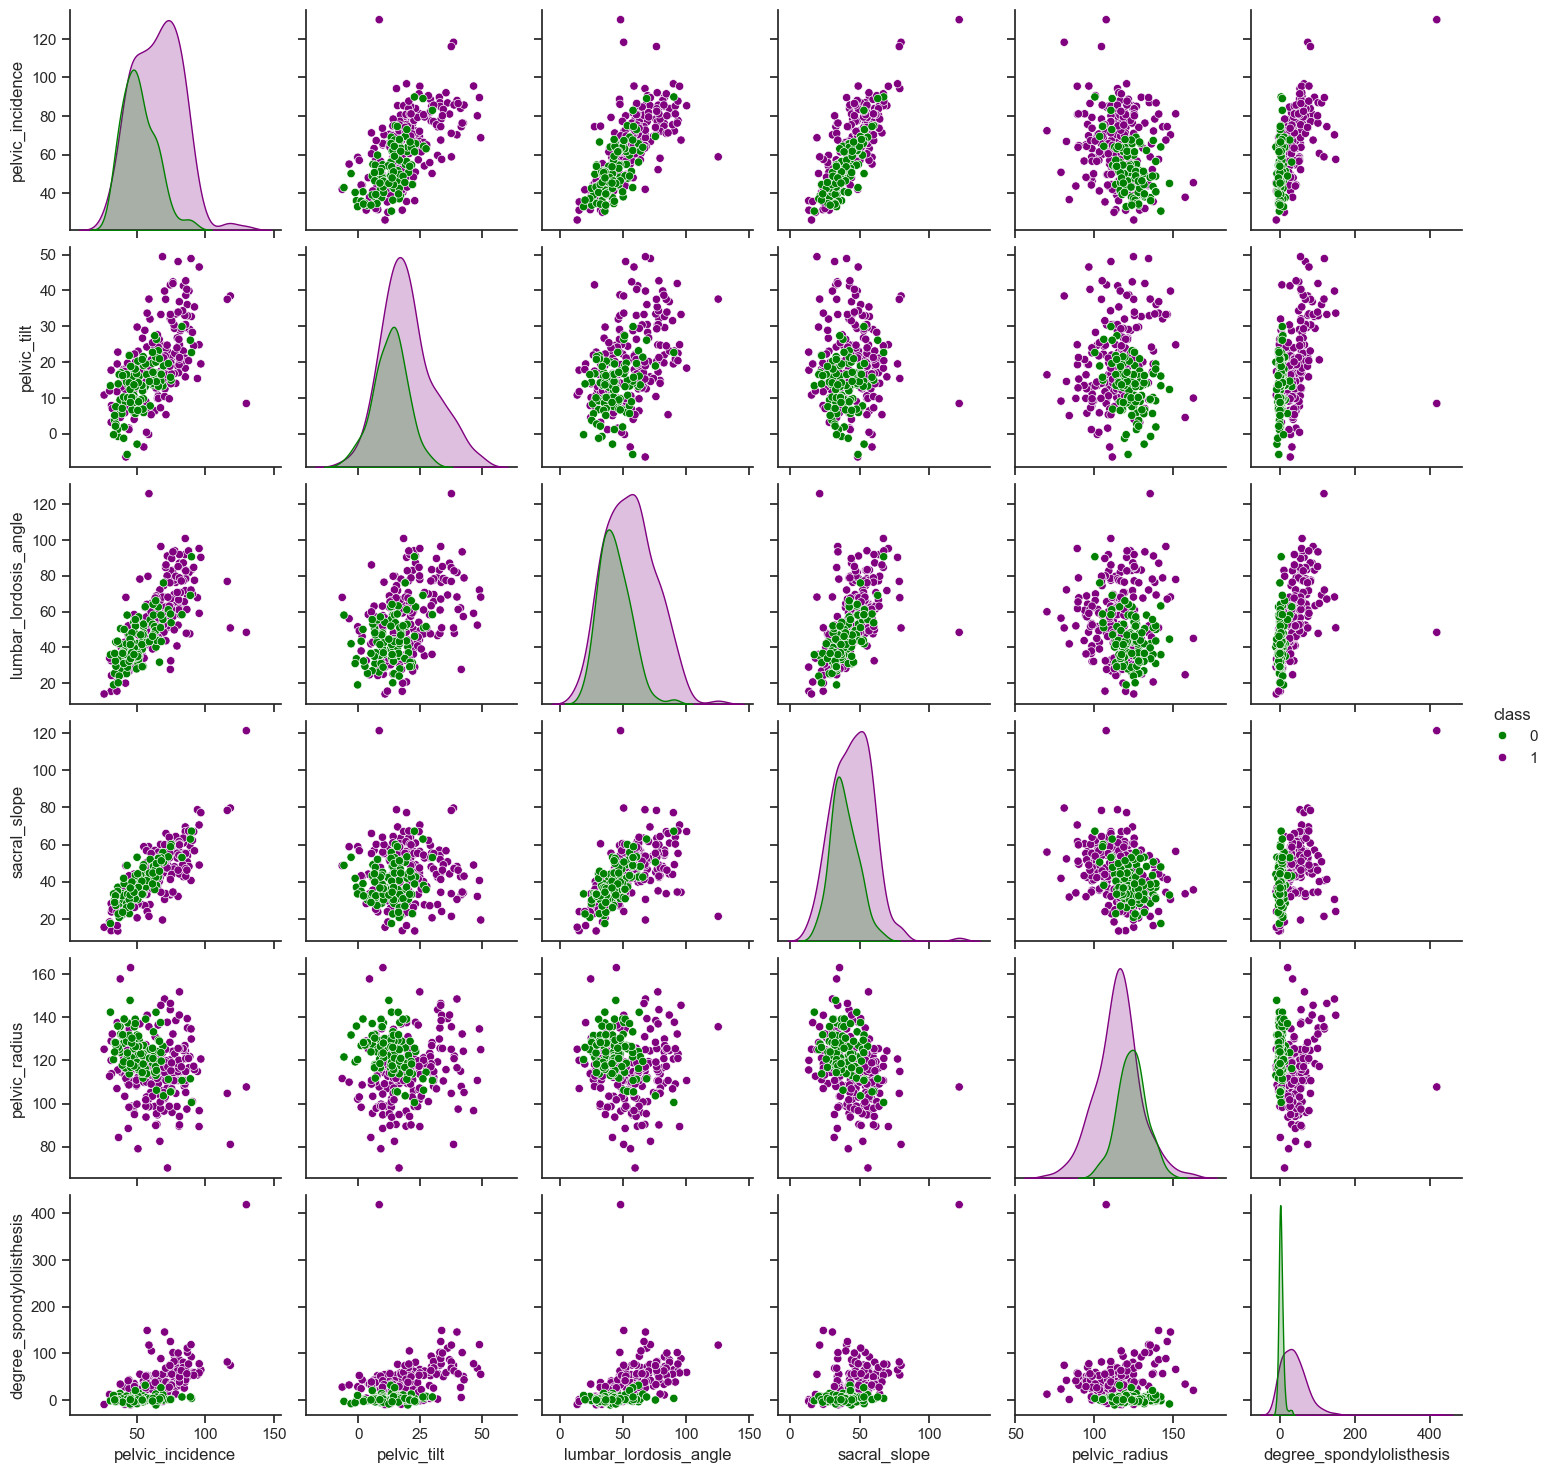

In [ ]:
df['class'] = df['class'].map({b'Abnormal': 1, b'Normal': 0})
df['class'] = pd.Categorical(df['class'])

palette = {0: 'green', 1: 'purple'}

sns.set(style ="ticks")
sns.pairplot(df, hue="class", palette=palette)
plt.show()

#### ii. Boxplots

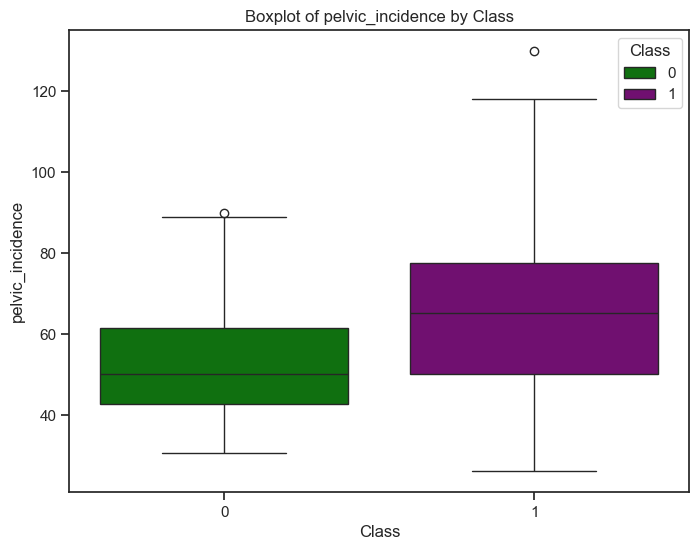

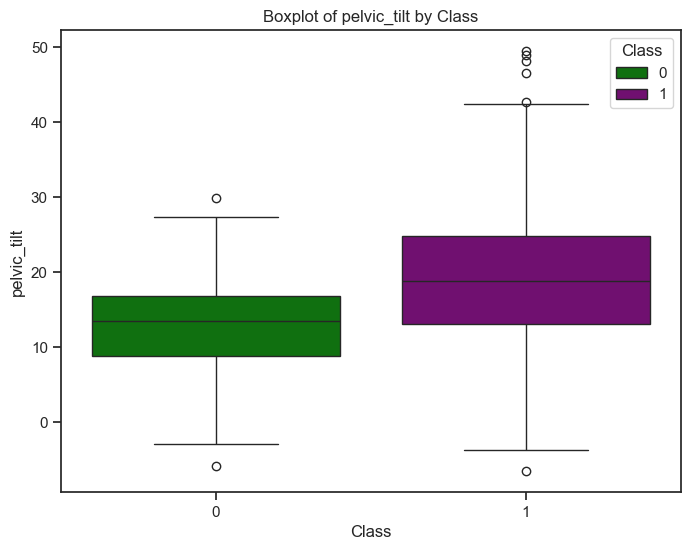

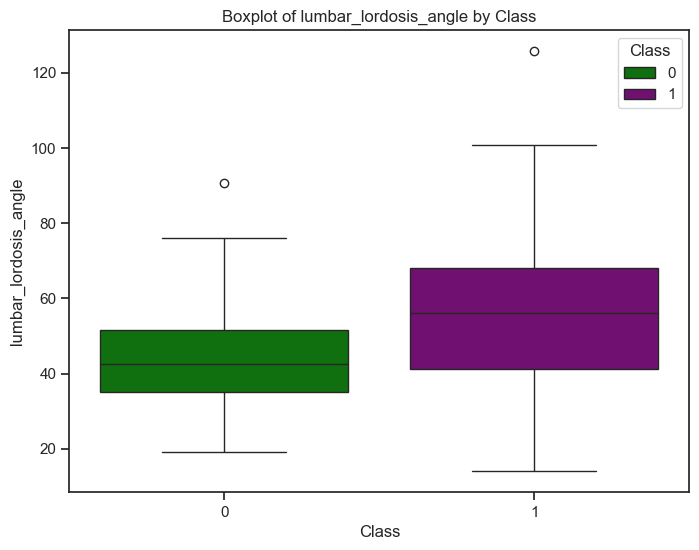

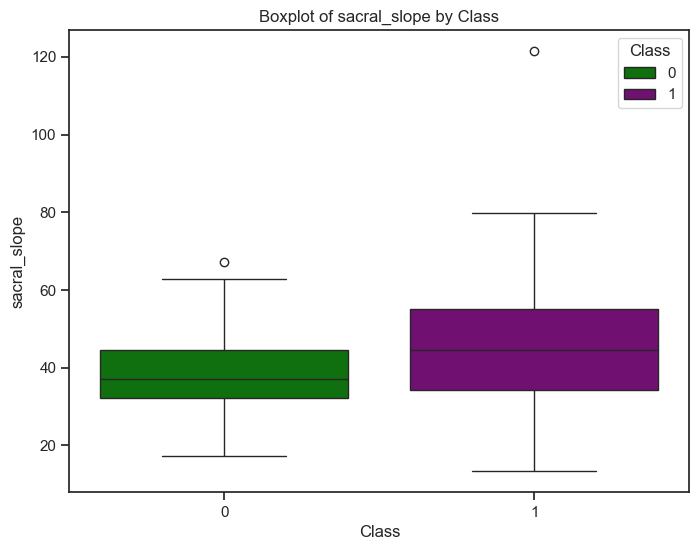

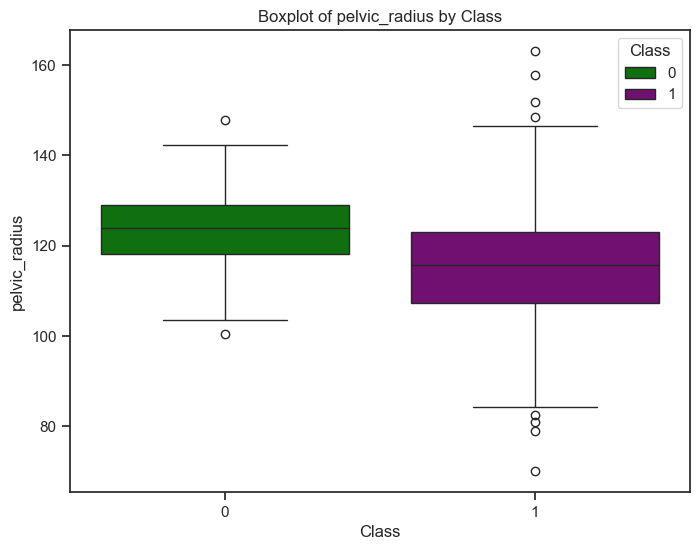

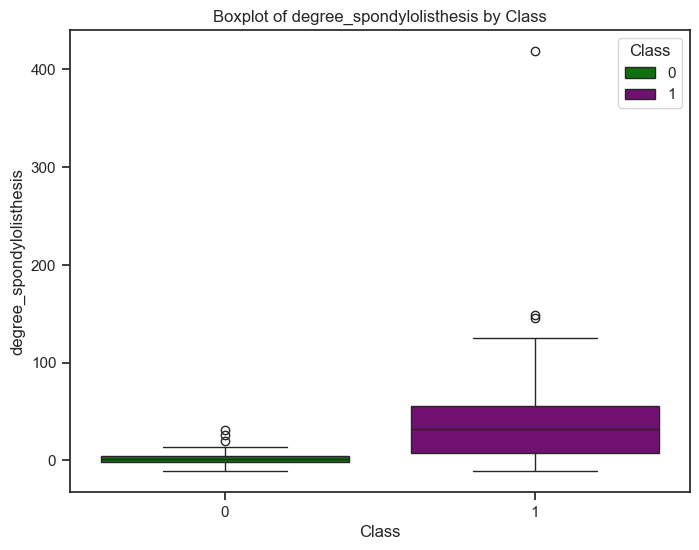

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=column, data=df, hue='class', palette=palette)
    plt.title(f'Boxplot of {column} by Class')
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.legend(title='Class')
    plt.show()

#### iii. Split Data Set

In [ ]:
class0_train = df[df['class'] == 0].iloc[:70]
class1_train = df[df['class'] == 1].iloc[:140]

# Concatenate
train_set = pd.concat([class0_train, class1_train])

# remaining as test
test_set = df.drop(train_set.index)


### (c) Classification

#### i. Euclidean Metric

In [ ]:
!pip install scikit-learn

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


data = arff.loadarff('/Users/shriyaaraveeti/Downloads/vertebral_column_data (1)/column_2C_weka.arff')
df = pd.DataFrame(data[0])

X_train = train_set.drop(columns=['class'])
y_train = train_set['class']

# Prepare test data
X_test = test_set.drop(columns=['class'])
y_test = test_set['class']

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


#### ii. Test Data

In [ ]:
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

k_value = 210

max_score_k = 0
max_score = 0

while k_value > 0:
    knn_classifier = KNeighborsClassifier(n_neighbors=k_value, p=2)

    knn_classifier.fit(X_train, y_train_encoded)

    y_pred = knn_classifier.predict(X_test)

    score = knn_classifier.score(X_test, y_test_encoded)

    if score > max_score:
        max_score = score
        max_score_k = k_value

    k_value -= 1

print("Optimal k:", max_score_k)
print("Minimum Error:", 1 - max_score)

k_star = max_score_k

k_star_classifier = KNeighborsClassifier(n_neighbors=k_star, p=2)
k_star_classifier.fit(X_train, y_train)

y_pred_k_star = k_star_classifier.predict(X_test)

# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred_k_star)
print("\nConfusion Matrix:")
print(con_matrix)

TP = con_matrix[1, 1]
TN = con_matrix[0, 0]
FP = con_matrix[0, 1]
FN = con_matrix[1, 0]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("\nTrue Positive Rate:", TPR)
print("True Negative Rate:", TNR)

# precision
precision = precision_score(y_test, y_pred_k_star)
print("Precision:", precision)

# F1-score
b = f1_score(y_test, y_pred_k_star)
print("F1-score:", b)

Optimal k: 3
Minimum Error: 0.07999999999999996

Confusion Matrix:
[[23  7]
 [ 1 69]]

True Positive Rate: 0.9857142857142858
True Negative Rate: 0.7666666666666667
Precision: 0.9078947368421053
F1-score: 0.9452054794520548


#### iii. Learning Curve

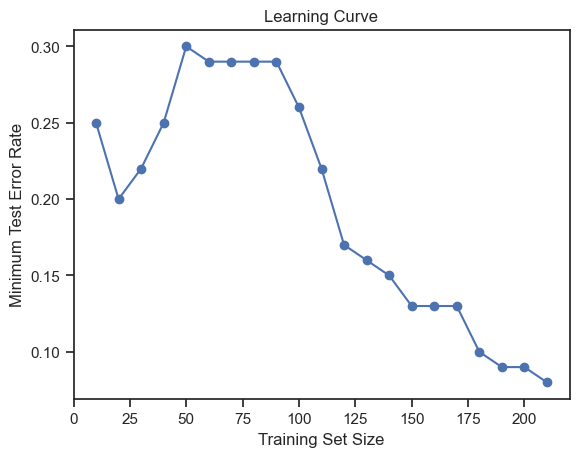

In [ ]:
training_set_sizes = range(10, 211, 10)
min_error_rates = []

for N in training_set_sizes:

    # Select size of training set
    class0_subset = class0_train.head(N // 3)
    class1_subset = class1_train.head(N - (N // 3))
    train_subset = pd.concat([class0_subset, class1_subset])


    min_error_rate = 50.0
    optimal_k = 0

    for k in range(1, N, 5):

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_subset.iloc[:, :-1], train_subset['class'])

        y_pred = knn.predict(X_test)

        error_rate = 1 - knn.score(X_test, y_pred)

        if error_rate < min_error_rate:
            min_error_rate = error_rate
            optimal_k = k

    min_error_rates.append(min_error_rate)

# Plot
plt.plot(training_set_sizes, best_error_rates, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Minimum Test Error Rate')
plt.title('Learning Curve')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [ ]:
error_rates = []
k_values = []

for k in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_score = knn.score(X_test, y_test)

    error_rates.append(1-accuracy_score)
    k_values.append(k)

results_table = pd.DataFrame({"k": k_values, "Error Rates": error_rates})
print(results_A)

optimal_k = results_table.loc[results_table['Error Rates'].idxmin(), 'k']
print("Optimal k:", optimal_k)

      k  Error Rates
0     1         0.11
1     6         0.11
2    11         0.11
3    16         0.12
4    21         0.12
5    26         0.11
6    31         0.12
7    36         0.13
8    41         0.13
9    46         0.13
10   51         0.14
11   56         0.13
12   61         0.15
13   66         0.15
14   71         0.14
15   76         0.14
16   81         0.16
17   86         0.15
18   91         0.20
19   96         0.20
20  101         0.22
21  106         0.21
22  111         0.23
23  116         0.21
24  121         0.22
25  126         0.24
26  131         0.28
27  136         0.28
28  141         0.30
29  146         0.30
30  151         0.30
31  156         0.30
32  161         0.30
33  166         0.30
34  171         0.30
35  176         0.30
36  181         0.30
37  186         0.30
38  191         0.30
39  196         0.30
Optimal k: 1


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [ ]:
error_rates = []
p_values = [0.1 * i for i in range(1, 11)]

for p in p_values:

    knn = KNeighborsClassifier(n_neighbors = optimal_k, p=p)
    knn.fit(X_train, y_train)

    accuracy_score_minkowski = knn.score(X_test, y_test)

    error_rates.append(1 - accuracy_score_minkowski)

results_minkowski = pd.DataFrame({"p_values": p_values, "Error Rates": error_rates})
print(results_minkowski)

min_error_rate_index = results_minkowski['Error Rates'].idxmin()
min_error_rate = results_minkowski.loc[min_error_rate_index, 'Error Rates']
optimal_p = results_minkowski.loc[min_error_rate_index, 'p_values']

print("Optimal p:", optimal_p)
print("Minimum error rate:", min_error_rate)

   p_values  Error Rates
0       0.1         0.24
1       0.2         0.22
2       0.3         0.18
3       0.4         0.16
4       0.5         0.15
5       0.6         0.15
6       0.7         0.15
7       0.8         0.13
8       0.9         0.11
9       1.0         0.11
Optimal p: 0.9
Minimum error rate: 0.10999999999999999


/Users/shriyaaraveeti/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/shriyaaraveeti/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/shriyaaraveeti/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/shriyaaraveeti/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/s

##### C. Chebyshev Distance With p -> infinity.

In [ ]:
k_values = range(1, 197, 5)

error_rates_chebyshev = []
k_values_chebyshev = []

for k in k_values:
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, p=float('inf'))
    knn_chebyshev.fit(X_train, y_train)
    y_pred_chebyshev = knn_chebyshev.predict(X_test)

    accuracy_chebyshev = knn_chebyshev.score(X_test, y_test)
    error_rates_chebyshev.append(1 - accuracy_chebyshev)
    k_values_chebyshev.append(k)


results_chebyshev = pd.DataFrame({"k values": k_values_chebyshev, "Error Rates": error_rates_chebyshev})

min_error_chebyshev = results_chebyshev['Error Rates'].min()
optimal_k_chebyshev = results_chebyshev.loc[results_chebyshev['Error Rates'].idxmin(), 'k values']

print("Minimum error rate chebyshev distance:", min_error_chebyshev)
print("Optimal k chebyshev distance:", optimal_k_chebyshev)

Minimum error rate chebyshev distance: 0.07999999999999996
Optimal k chebyshev distance: 16


#### ii. Mahalanobis Distance.

In [ ]:
min_error_rate_md = 10000
optimal_k_md = 0
error_rates_md = []
k_values_md = []

S = np.cov(X_train, rowvar=False)
SI = np.linalg.pinv(S)

for k in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': SI})
    knn.fit(X_train, y_train)
    accuracy_score = knn.score(X_test, y_test)

    error_rate = 1 - accuracy_score
    error_rates_md.append(error_rate)
    k_values_md.append(k)

    if error_rate < min_error_rate_md:
        min_error_rate_md = error_rate
        optimal_k_md = k

results_mahalanobis = pd.DataFrame({"k": k_values_md, "Error Rates": error_rates_md})
print("Best score for Mahalanobis Distance:", min_error_rate_md)
print("Best k for Mahalanobis Distance:", optimal_k_md)

Best score for Mahalanobis Distance: 0.15000000000000002
Best k for Mahalanobis Distance: 1


### (e) Weighted Decision

In [ ]:
k_values = list(range(1, 197, 5))
distance_methods = ['euclidean', 'manhattan', 'chebyshev']

min_error_rates = []
optimal_ks = []

for method in distance_methods:
    min_error_rate = float('inf')
    optimal_k = None
    error_rates = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=method)
        knn.fit(X_train, y_train)

        error_rate = 1 - knn.score(X_test, y_test)
        error_rates.append(error_rate)

        if error_rate < min_error_rate:
            min_error_rate = error_rate
            optimal_k = k

    min_error_rates.append(min_error_rate)
    optimal_ks.append(optimal_k)

results_weighted_voting = pd.DataFrame({"Distance Metric": distance_methods,
                                        "Minimum Error Rate": min_error_rates,
                                        "Optimal k": optimal_ks})

print(results_weighted_voting)

  Distance Metric  Minimum Error Rate  Optimal k
0       euclidean                0.10          6
1       manhattan                0.10         26
2       chebyshev                0.11         16


### (f) Training Error Rate

0.07999999999999996 for chebyshev distance